# 重回帰（特徴量：ALL）の学習→予測→評価


In [1]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install scikit-learn==1.2.2

In [2]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(sklearn.__version__) 

1.5.3
1.22.4
3.7.1
1.2.2


In [4]:
# データセットの読み込み
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# 特徴量と目的変数の設定
X = df.drop(['MedHouseVal'], axis=1)
y = df['MedHouseVal']
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
print('X_trainの形状：', X_train.shape, ' y_trainの形状：', y_train.shape, ' X_testの形状：', X_test.shape, ' y_testの形状：', y_test.shape)

X_trainの形状： (16512, 8)  y_trainの形状： (16512,)  X_testの形状： (4128, 8)  y_testの形状： (4128,)


In [7]:
# 特徴量の標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 変換器の作成
num_cols = X.columns[0:13] # 全て数値型の特徴量なので全て取得
scaler.fit(X_train[num_cols]) # 学習データでの標準化パラメータの計算
X_train[num_cols] = scaler.transform(X_train[num_cols]) # 学習データの変換
X_test[num_cols] = scaler.transform(X_test[num_cols]) # テストデータの変換

display(X_train.iloc[:2]) # 標準化された学習データの特徴量

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12069,0.190012,-1.795076,0.907714,0.149243,-1.047601,0.074082,-0.840062,1.003899
15925,0.269311,1.855539,-0.042002,0.009186,0.052109,0.045276,0.985364,-1.434772


In [8]:
# モデルの学習
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 線形回帰モデル
model.fit(X_train, y_train)
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [9]:
# テストデータの予測と評価
y_test_pred = model.predict(X_test)
print('RMSE test: %.2f' % (mean_squared_error(y_test, y_test_pred) ** 0.5))

RMSE test: 0.73


In [10]:
# テストデータの目的関数の統計情報
y_test.describe()

count    4128.000000
mean        2.052795
std         1.142047
min         0.149990
25%         1.188000
50%         1.778000
75%         2.656000
max         5.000010
Name: MedHouseVal, dtype: float64

# 予測値の解釈

In [11]:
# パラメータ
print('回帰係数 w = [w1, w2, … , w13]:', model.coef_)
print('定数項 w0:', model.intercept_) 

回帰係数 w = [w1, w2, … , w13]: [ 0.82624793  0.1171006  -0.24891059  0.29038746 -0.00864349 -0.03056429
 -0.90042112 -0.87058566]
定数項 w0: 2.0724989589389438


In [12]:
# 特徴量の列テキスト表示
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

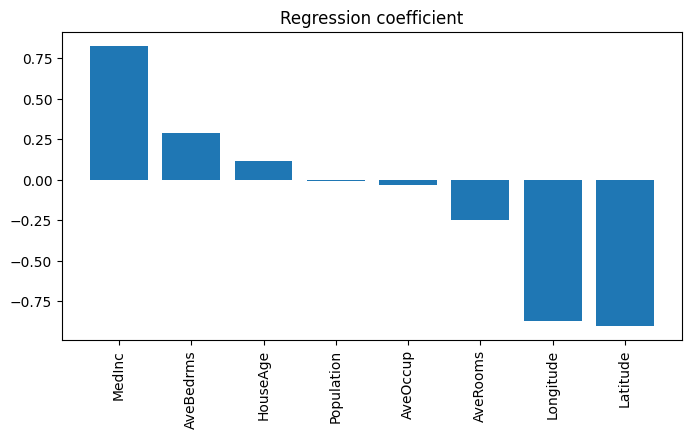

In [13]:
# 回帰係数の可視化
importances = model.coef_ # 回帰係数
indices = np.argsort(importances)[::-1] # 回帰係数を降順にソート

plt.figure(figsize=(8, 4)) #プロットのサイズ指定
plt.title('Regression coefficient') # プロットのタイトルを作成
plt.bar(range(X.shape[1]), importances[indices]) # 棒グラフを追加
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90) # X軸に特徴量の名前を追加
plt.show() # プロットを表示

In [14]:
# 予測値のリスト
y_test_pred

array([2.28110738, 2.79009128, 1.90332794, ..., 0.8418697 , 2.7984953 ,
       2.21779325])

In [15]:
# 15件目の予測値
y_test_pred[14]

2.190728129688947

In [16]:
# 15件目の特徴量
print('15件目の特徴量 X = [x1, x2, … , x8]:', X_test.values[14]) # pandasをnumpyに変換

15件目の特徴量 X = [x1, x2, … , x8]: [ 0.31771831  0.34767623  0.31388217 -0.10764982 -0.87875154  0.00313711
 -0.69028383  0.80940342]


In [17]:
# 15件目予測値の検証
# y = w * X + w0
np.sum(model.coef_ * X_test.values[14]) + model.intercept_

2.190728129688947